In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['decir', 'actriz', 'favorito', 'amiga', 'gara...
1      ['gustar', 'acabar', 'normalmente', 'cara', 'b...
2      ['ir', 'calle', 'cara', 'sensual', 'cara', 'se...
3      ['mañana', 'hablar', 'mayoría', 'chica', 'habe...
4      ['haber', 'entrevistar', 'nivel', 'flipar', 'p...
                             ...                        
136    ['pasar', 'romeo', 'monstruo', 'papi', 'tv', '...
137    ['puro', 'mover', 'intentar', 'negro', 'pasar'...
138    ['opina', 'juego', 'hablar', 'llevar', 'borrot...
139    ['veis', 'permitir', 'liga', 'quisiérar', 'lle...
140    ['categoría', 'albornoz', 'gusta', 'cualquiera...
Name: transcript, Length: 141, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 5.38
Total occurrences of 'xxxx' per transcript: 758.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
valer valer valer: 92
esperar gustar vídeo: 88
negro subir youtube: 69
papi tve negro: 63
ver rapear ocurrir: 51
tve negro subir: 48
negro manzán podrido: 47
oveja negro manzán: 45
vestí piensa nube: 38
estar preparado hábito: 37
youtube vestí piensa: 36
edad perdistir virginidad: 35
subir youtube vestí: 34
papi tv negro: 33
decir oveja negro: 32
suscribiro dar él like: 31
mostrar papi tv: 30
persona haber sexo: 29
máximo persona haber: 28
tv negro subir: 28


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.014*"valer" + 0.010*"gustar" + 0.009*"querer" + 0.009*"ver" + 0.009*"xxxx" + 0.008*"vídeo" + 0.008*"decir" + 0.007*"cosa" + 0.007*"pasar" + 0.007*"persona"
Topic: 1, Words: 0.017*"gustar" + 0.015*"valer" + 0.010*"querer" + 0.010*"decir" + 0.009*"ver" + 0.008*"cosa" + 0.008*"xxxx" + 0.008*"música" + 0.008*"persona" + 0.007*"vídeo"
Topic: 2, Words: 0.018*"valer" + 0.014*"gustar" + 0.011*"querer" + 0.011*"decir" + 0.009*"ver" + 0.009*"persona" + 0.009*"pasar" + 0.008*"tener" + 0.008*"cosa" + 0.007*"xxxx"
Topic: 3, Words: 0.019*"valer" + 0.016*"negro" + 0.010*"vídeo" + 0.010*"música" + 0.010*"ver" + 0.010*"querer" + 0.009*"decir" + 0.008*"gustar" + 0.008*"pasar" + 0.007*"gente"
Topic: 4, Words: 0.011*"valer" + 0.010*"ver" + 0.010*"xxxx" + 0.009*"gustar" + 0.009*"poner" + 0.009*"decir" + 0.008*"música" + 0.007*"vídeo" + 0.007*"pasar" + 0.007*"querer"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
xxxx: 8.03250383123848
persona: 6.6694799477331435
poner: 6.495886954177328
sexo: 5.811788055301893
plan: 5.581753470358822
haber: 5.019619145080023
hacer: 4.557803604672745
hablar: 4.467863290344192
venir: 4.341755378950012
vida: 4.240239828156006


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('valer', 1555), ('gustar', 1183), ('querer', 952), ('decir', 918), ('ver', 908), ('xxxx', 758), ('música', 742), ('pasar', 721), ('vídeo', 718), ('cosa', 704), ('persona', 648), ('estar', 619), ('negro', 614), ('tener', 604), ('gente', 592)]
       Word  Frequency
0     valer       1555
1    gustar       1183
2    querer        952
3     decir        918
4       ver        908
5      xxxx        758
6    música        742
7     pasar        721
8     vídeo        718
9      cosa        704
10  persona        648
11    estar        619
12    negro        614
13    tener        604
14    gente        592


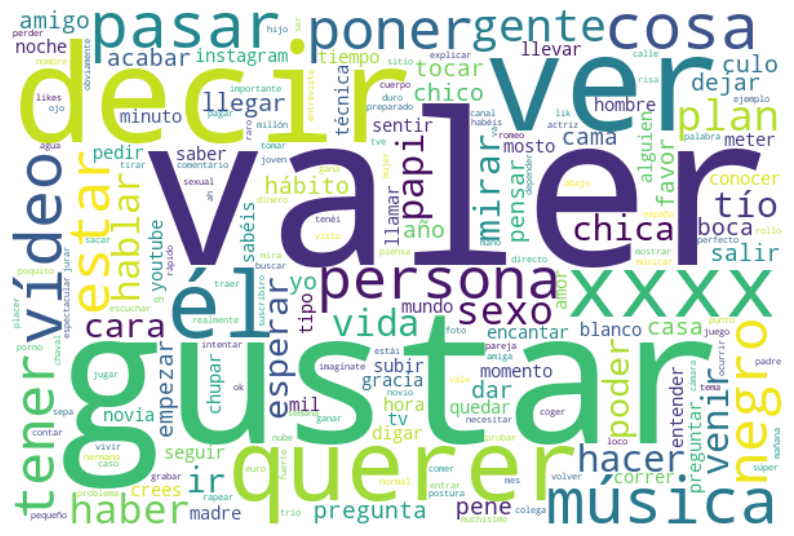

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()